In [1]:
'''
IC272 DS3
Lab 3
Shubham Shukla
B20168
'''

'''Question 1'''

# importing the important packages
import pandas as pd

# reading the csv file
df = pd.read_csv('pima-indians-diabetes.csv')

# dropping the class attribute
df = df.drop('class', axis = 1)

# creating the median series for df
median_data = df.median()

# creating a function which will delete the outliers of the passed attribute
def del_outliers(att):
    quart_data = df[att].quantile([0.25, 0.50, 0.75])
    lower_bound = quart_data[0.25] - 1.5*(quart_data[0.75] - quart_data[0.25])
    upper_bound = quart_data[0.75] + 1.5*(quart_data[0.75] - quart_data[0.25])
    for i in df.index:
        if(df.loc[i, att] < lower_bound or df.loc[i, att] > upper_bound):
            df.loc[i, att] = quart_data[0.50]

# deleting outliers
for att in df.columns:
    del_outliers(att)

# #Part(a)

# initial min max data
lst_ini = [df.min(), df.max()]
ini_minmax = pd.DataFrame(lst_ini, index = ['min', 'max'])
print("Minimum and maximum attribute values before normalization : \n")
print(ini_minmax)

# applying min max normalization to take data in range of 5 - 10
for att in df.columns:
    df[att] =( (df[att] - ini_minmax.loc['min', att])/(ini_minmax.loc['max',att] - ini_minmax.loc['min', att]) )*7 + 5;
    
# final min max data
lst_fin = [df.min(), df.max()]
fin_minmax = pd.DataFrame(lst_fin, index = ['min', 'max'])
print("\nMinimum and maximum attribute values after normalization : \n")
print(fin_minmax)

# #Part(b)

# mean and std data before standardization
lst = [df.mean(), df.std()]
mean_std_ini = pd.DataFrame(lst, index = ['mean', 'std'])
print("\nMean and standard deviation before standardization : \n")
print(mean_std_ini)

# standardizing the data by z-standardization method
for att in df.columns:
    df[att] = (df[att] - mean_std_ini.loc['mean', att])/mean_std_ini.loc['std', att]

# mean and std after standardization
lst2 = [df.mean(), df.std()]
mean_std_fin = pd.DataFrame(lst2, index = ['mean', 'std'])
print("\nMean and standard deviation before and after standardization : \n")
print(mean_std_fin)

Minimum and maximum attribute values before normalization : 

     pregs   plas   pres  skin   test   BMI   pedi   Age
min    0.0   44.0   38.0   0.0    0.0  18.2  0.078  21.0
max   13.0  199.0  106.0  63.0  318.0  50.0  1.191  66.0

Minimum and maximum attribute values after normalization : 

     pregs  plas  pres  skin  test   BMI  pedi   Age
min    5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0
max   12.0  12.0  12.0  12.0  12.0  12.0  12.0  12.0

Mean and standard deviation before standardization : 

         pregs      plas      pres      skin      test       BMI      pedi  \
mean  7.036759  8.507056  8.520240  7.270833  6.340990  8.081532  7.199166   
std   1.761116  1.374632  1.147457  1.744284  1.708961  1.411129  1.541902   

           Age  
mean  6.829398  
std   1.719727  

Mean and standard deviation before and after standardization : 

             pregs          plas          pres          skin          test  \
mean -3.908910e-16 -5.227300e-16 -2.405483e-16  1.139135e-16

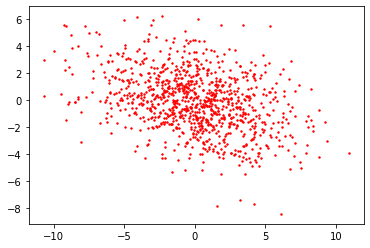

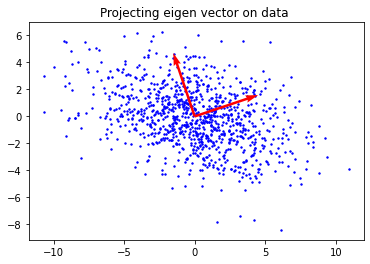

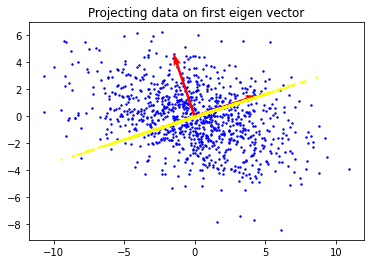

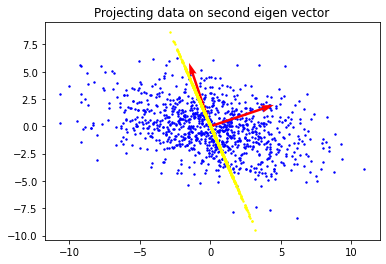

The error in the reconstruction of data is :  21.035077211945566


In [2]:
'''Question 2'''

# importing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Storing the given data in some variables
mean_ = [0, 0]
covariance_ = [[13, -3], [-3, 5]]

# Creating 2D synthetic data
data_array = np.random.multivariate_normal(mean_, covariance_, 1000)
data = pd.DataFrame(data_array, columns = ['x', 'y'])

#Part(a)

# drawing scatter
plt.scatter(data['x'], data['y'], s = 2, color = 'r')
plt.show()

#Part(b)

# Creting a function to create covariance matrix
def create_cov(inp):
    ind = inp.columns
    lst = []
    cov_list = []
    for i in ind:
        for j in ind:
            cov_list.append(inp[i].cov(inp[j]))
        lst.append(cov_list)
        cov_list = []
    return lst

# Covariance matrix
cov_matrix = create_cov(data)

# Covariance dataframe for better representation
cov_df = pd.DataFrame(cov_matrix, index = ['x', 'y'], columns = ['x', 'y'])

# Computing eigen values and eigen vectors using numpy inbuilt function
eigen_data = np.linalg.eig(cov_df)
eigen_df = pd.DataFrame(eigen_data[1], columns = ['x', 'y'], index = ['v1', 'v2']);

# plotting the data and eigen direction 
plt.scatter(data['x'], data['y'], s = 2, color = 'b')
plt.quiver([0,0], [0,0], eigen_df['x'], eigen_df['y'], scale = 5, color = 'r')
plt.title("Projecting eigen vector on data ")
plt.show()

#Part(c) 

# projecting value 1
pr_val = np.dot(data, [[eigen_df.iloc[0, 0]], [eigen_df.iloc[0, 1]]])
mod_vec = (sum(eigen_df.iloc[0, :]**2))**0.5
pr_vec = pr_val/mod_vec;
x_pr_vec = pr_vec*eigen_df.iloc[0, 0]
y_pr_vec = pr_vec*eigen_df.iloc[0, 1]
# plotting the eigen directed arrows on scatter plot
plt.scatter(data['x'], data['y'], s = 2, color = 'b')
plt.quiver([0,0], [0,0], eigen_df['x'], eigen_df['y'], scale = 5, color = 'r')
plt.scatter(x_pr_vec, y_pr_vec, color = 'yellow', s = 2)
plt.title("Projecting data on first eigen vector")
plt.show()

# projecting value 2
pr_val2 = np.dot(data, [[eigen_df.iloc[1, 0]], [eigen_df.iloc[1, 1]]])
mod_vec2 = (sum(eigen_df.iloc[1, :]**2))**0.5
pr_vec2 = pr_val/mod_vec;
x_pr_vec2 = pr_vec2*eigen_df.iloc[1, 0]
y_pr_vec2 = pr_vec2*eigen_df.iloc[1, 1]
# plotting the eigen directed arrows on scatter plot
plt.scatter(data['x'], data['y'], s = 2, color = 'b')
plt.quiver([0,0], [0,0], eigen_df['x'], eigen_df['y'], scale = 5, color = 'r')
plt.scatter(x_pr_vec2, y_pr_vec2, color = 'yellow', s = 2)
plt.title("Projecting data on second eigen vector")
plt.show()

#Part(d)

# reconstructing the data 
lst = list()
lst = [np.array(data['x']*(eigen_df.loc['v1', 'x']/mod_vec) + data['y']*(eigen_df.loc['v2', 'x']/mod_vec2)),\
            np.array(data['x']*(eigen_df.loc['v1', 'y']/mod_vec) + data['y']*(eigen_df.loc['v2', 'y']/mod_vec2))]
reconst_df = pd.DataFrame(lst, index = ['x', 'y'])
error = (sum((reconst_df.loc['x', :] - data['x'])**2))**0.5
print('The error in the reconstruction of data is : ' ,error)

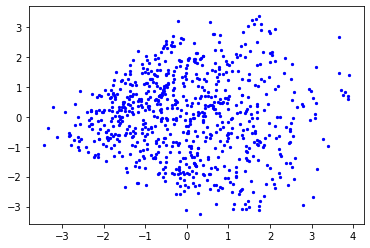

Variance of the data :  [1.99246305 1.85342219]

Eigen values of the data :  [1.99246305 1.85342219 0.40462751 0.43414282 0.63640837 0.98187914
 0.8387496  0.85830733]


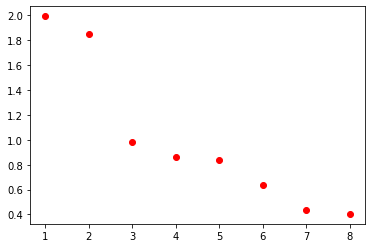


The covariance matrix for 2 components is as follows : 

              0             1
0  1.992463e+00 -8.105931e-16
1 -8.105931e-16  1.853422e+00

The covariance matrix for 3 components is as follows : 

              0             1             2
0  1.992463e+00  5.280435e-16  1.528547e-16
1  5.280435e-16  1.853422e+00  3.473970e-17
2  1.528547e-16  3.473970e-17  9.818791e-01

The covariance matrix for 4 components is as follows : 

              0             1             2             3
0  1.992463e+00 -3.520290e-16  3.242372e-16  1.482227e-16
1 -3.520290e-16  1.853422e+00  4.469842e-16 -6.368946e-17
2  3.242372e-16  4.469842e-16  9.818791e-01  6.484745e-17
3  1.482227e-16 -6.368946e-17  6.484745e-17  8.583073e-01

The covariance matrix for 5 components is as follows : 

              0             1             2             3             4
0  1.992463e+00  4.724600e-16 -3.311852e-16 -1.760145e-16 -4.400362e-16
1  4.724600e-16  1.853422e+00 -3.265532e-16 -3.277112e-16  3.856107e

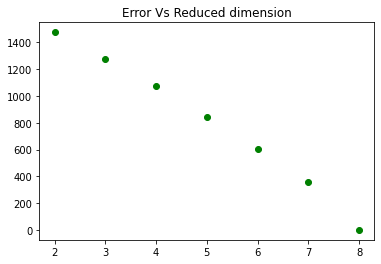


covariance matrix for the original data : 

          pregs      plas      pres      skin      test       BMI      pedi  \
pregs  1.000000  0.117692  0.208953 -0.096720 -0.108474  0.028339  0.004519   
plas   0.117692  1.000000  0.204539  0.060034  0.179566  0.228245  0.081613   
pres   0.208953  0.204539  1.000000  0.025645 -0.050956  0.271560  0.022495   
skin  -0.096720  0.060034  0.025645  1.000000  0.472714  0.373726  0.152763   
test  -0.108474  0.179566 -0.050956  0.472714  1.000000  0.171503  0.198580   
BMI    0.028339  0.228245  0.271560  0.373726  0.171503  1.000000  0.123776   
pedi   0.004519  0.081613  0.022495  0.152763  0.198580  0.123776  1.000000   
Age    0.560768  0.274264  0.326372 -0.101397 -0.073726  0.077668  0.036109   

            Age  
pregs  0.560768  
plas   0.274264  
pres   0.326372  
skin  -0.101397  
test  -0.073726  
BMI    0.077668  
pedi   0.036109  
Age    1.000000  


In [3]:
'''Question 3'''

# importing the important packages to analyze through PCA
from sklearn import decomposition as dec

## Part(a)

# making 8 dimensions to 2 dimensions
pca = dec.PCA(n_components = 2)
pca.fit(df)
new_df = pca.transform(df)
new_df = pd.DataFrame(new_df, columns = ['x', 'y'])
# plotting the reduced dimension data
plt.scatter(new_df['x'], new_df['y'], color = 'blue', s = 5)
plt.show()

# variance of the new data
var_new_df = new_df.var(); print("Variance of the data : ",var_new_df.values);print()

## Part(b)

# computing the eigen values of the data
cov_new_df = (create_cov(new_df))
eig_new_df = np.linalg.eig(cov_new_df)
total_eig = np.linalg.eig(create_cov(df));print("Eigen values of the data : " ,total_eig[0])

# Eigen _values in descending order 
desc_eigval = list(total_eig[0])
desc_eigval.sort();desc_eigval.reverse()
x_val = [(i + 1) for i in range(len(desc_eigval))]
plt.scatter(x_val, desc_eigval, color = 'r')
plt.show()

## Part(c)

# making a dictionary to store the error in Euclidean distance
err_data = dict()

# creating a function to give error values corresponding to the passed reduced dimension
def error(l):
    pca = dec.PCA(n_components = l)
    pca.fit(df)
    new_df = pca.transform(df)
    back_data = pca.inverse_transform(new_df)
    back_data = pd.DataFrame(back_data)
    error = 0;
    for i in range(((back_data.shape)[0])):
        error += (sum((back_data.iloc[i, :].values - df.iloc[i, :].values)**2))**0.5
    new_df = pd.DataFrame(new_df)
    cov_mt = pd.DataFrame(create_cov(new_df))
    print(f"\nThe covariance matrix for {l} components is as follows : \n")
    print(cov_mt)
    return error;

# printing the covariance matrix corr. to components
for i in range(2, 9):
    err_data[i] = error(i)

# plotting graph for the error vs component
plt.scatter(err_data.keys(), err_data.values(), color = 'g')
plt.title("Error Vs Reduced dimension")
plt.show()

## Part(d)

# covariance matrix for the original data
cov_mat = pd.DataFrame(create_cov(df), index = df.columns, columns = df.columns)
print("\ncovariance matrix for the original data : \n")
print(cov_mat)